# 9 Facial Expressions You Need

# ❇️ Importing Necessary Libraries

In [1]:
import os
import cv2
import numpy as np

- **os** → Handles file and folder operations (e.g., list, create, delete).  
- **cv2** → OpenCV library used for image processing (read, display, edit images).  
- **numpy** → Used for numerical operations and arrays (images are stored as NumPy arrays).

# 🔄 Counting Total Number of Images

In [10]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Paths to dataset folders
dataset_folders = [
    "/Users/natashababu/Documents/internship/facial-expression/9-Facial-expressions-You-Need/test/images",
    "/Users/natashababu/Documents/internship/facial-expression/9-Facial-expressions-You-Need/train/images",
    "/Users/natashababu/Documents/internship/facial-expression/9-Facial-expressions-You-Need/valid/images"
]

# Collect all image file paths from all folders
image_files = []
for folder in dataset_folders:
    for f in os.listdir(folder):
        if f.endswith(('.png', '.jpg', '.jpeg')):
            image_files.append(os.path.join(folder, f))

print(f"Total images: {len(image_files)}")

Total images: 68284


- `os` → for interacting with the operating system, e.g., listing files and handling paths.  
- `PIL.Image` → for opening or manipulating images (not used yet in this snippet).  
- `matplotlib.pyplot` → for plotting images (not used yet here).  
- `numpy` → for numerical operations on image data (also not used yet here).  

- `image_files = []` → create an empty list to store image paths.  
- `for folder in dataset_folders:` → loop through each folder.  
- `for f in os.listdir(folder):` → list all files in the current folder.  
- `if f.endswith(('.png', '.jpg', '.jpeg')):` → check if the file is an image.  
- `image_files.append(os.path.join(folder, f))` → add the full path of the image to `image_files`.  

✅ After this, `image_files` contains all image paths from test, train, and validation folders.  
- `len(image_files)` → counts how many images were collected.  
- Prints the total number of images across all folders.

# 🔍 Visualising Image Size Distribution

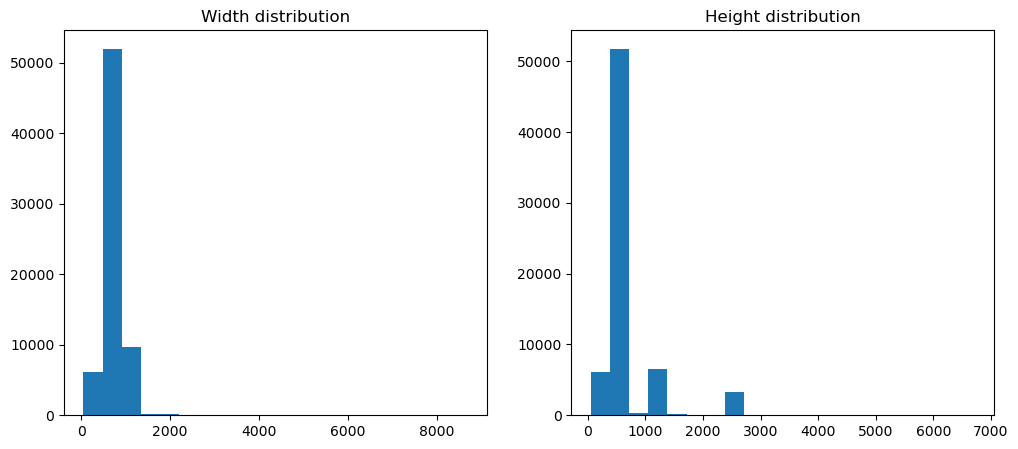

In [13]:
widths, heights = [], []

for img_path in image_files:
    img = Image.open(img_path)
    w, h = img.size
    widths.append(w)
    heights.append(h)

# Plot histogram
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(widths, bins=20)
plt.title("Width distribution")
plt.subplot(1,2,2)
plt.hist(heights, bins=20)
plt.title("Height distribution")
plt.show()

- `widths, heights = [], []` → create empty lists to store the width and height of each image.  

- `for img_path in image_files:` → loop through each image path in the dataset.  
  - `img = Image.open(img_path)` → open the image using PIL.  
  - `w, h = img.size` → get the width (`w`) and height (`h`) of the image.  
  - `widths.append(w)` → add the width to the `widths` list.  
  - `heights.append(h)` → add the height to the `heights` list.  

- Plot histogram:  
  - `plt.figure(figsize=(12,5))` → set the figure size.  
  - `plt.subplot(1,2,1)` → create the first subplot (left).  
    - `plt.hist(widths, bins=20)` → plot histogram of image widths.  
    - `plt.title("Width distribution")` → set title for width histogram.  
  - `plt.subplot(1,2,2)` → create the second subplot (right).  
    - `plt.hist(heights, bins=20)` → plot histogram of image heights.  
    - `plt.title("Height distribution")` → set title for height histogram.  
  - `plt.show()` → display both histograms.  

✅ This code **analyzes the dimensions of all images** in the dataset and visualizes the **distribution of widths and heights** using histograms.

# 🔎 Checking corrupted images

In [22]:
from PIL import Image
import os

corrupt_images = []

for img_path in image_files:
    try:
        img = Image.open(img_path)
        img.verify()  # Check if image is broken
    except (IOError, SyntaxError) as e:
        print(f"Corrupt image detected: {img_path}")
        corrupt_images.append(img_path)

print(f"\nTotal corrupt images: {len(corrupt_images)}")


Total corrupt images: 0


### This code goes through every image in the list **`image_files`** and checks if any of them are corrupted.

It starts by importing **PIL (Pillow)** to handle image files and initializes an empty list called **`corrupt_images`** to store the paths of broken images.

Then, it loops through each image path in **`image_files`**. For each one, it tries to open the image with **`Image.open(img_path)`** and calls **`img.verify()`**.

The **`verify()`** method checks if the image file is complete and correctly formatted. It doesn’t load the full image but ensures the file structure is valid.

If an image is damaged or unreadable, Python raises an **`IOError`** or **`SyntaxError`**. The **`except`** block catches this error, prints the path of the corrupted image, and adds it to the **`corrupt_images`** list.

After all images are checked, the code prints how many corrupted images were found in total.

# Visualising First Six Images

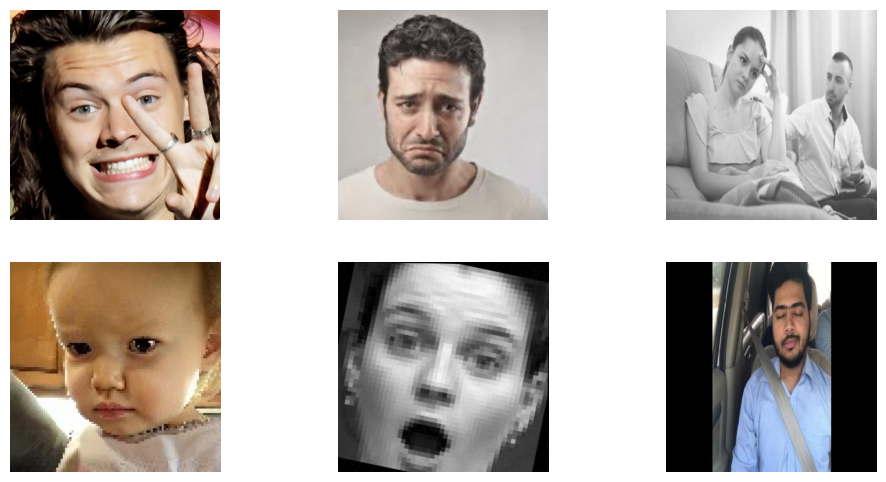

In [33]:
plt.figure(figsize=(12,6))
for i, img_path in enumerate(image_files[:6]):  # first 6 images
    img = Image.open(img_path)
    plt.subplot(2,3,i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

- `plt.figure(figsize=(12,6))` → create a figure with a width of 12 inches and height of 6 inches.  

- `for i, img_path in enumerate(image_files[:6]):` → loop through the **first 6 images** in the dataset.  
  - `img = Image.open(img_path)` → open the image using PIL.  
  - `plt.subplot(2,3,i+1)` → create a subplot grid with 2 rows and 3 columns, placing the current image in position `i+1`.  
  - `plt.imshow(img)` → display the image in the subplot.  
  - `plt.axis('off')` → hide the axes for a cleaner view.  

- `plt.show()` → display all 6 images in a 2×3 grid.  

✅ This code **visualizes the first 6 images** in your dataset for a quick inspection.

# ↺ Image Preprocessing

In [6]:
def preprocess_image(image_path, target_size=(640, 640), to_gray=False):
    img = cv2.imread(image_path)
    if img is None:
        return None
    if to_gray:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, target_size) # resize


    # Normalize for training (not saving)
    img_normalized = img / 255.0  # Scale to 0-1 for uint8 images

    # Convert back to uint8 for saving
    img_save = (img_normalized * 255).astype("uint8")

    # Save properly
    cv2.imwrite(os.path.join(output_img_path, file), cv2.cvtColor(img_save, cv2.COLOR_RGB2BGR))

### 🧩 Function: `preprocess_image`

**Purpose:**  
Preprocesses an image before training — resizing, color conversion, and normalization.

**Steps:**
1. **Read image**
   - `cv2.imread(image_path)` loads the image.
   - Returns `None` if the file doesn't exist.

2. **Color conversion**
   - If `to_gray=True`: convert to grayscale → `cv2.COLOR_BGR2GRAY`
   - Else: convert from BGR → RGB (OpenCV loads in BGR by default).

3. **Resize**
   - `cv2.resize(img, target_size)` resizes the image (default 640×640).

4. **Normalize**
   - `img / 255.0` scales pixel values from `0–255` to `0–1` for training.

5. **Convert back to uint8**
   - `(img_normalized * 255).astype("uint8")` brings values back to 8-bit format for saving.

6. **Save processed image**
   - `cv2.imwrite()` saves the image after converting RGB → BGR again for OpenCV.

**Note:**  
- `output_img_path` and `file` should be defined before calling `cv2.imwrite()`.


In [9]:
# folder
folders = ["train", "test", "valid"]
base_path = "/Users/natashababu/Documents/internship/facial-expression/9-Facial-Expressions-You-Need"
save_path = "/Users/natashababu/Documents/internship/facial-expression/preprocessed-dataset"

for folder in folders:
    input_img_path = os.path.join(base_path, folder, "images")
    input_lbl_path = os.path.join(base_path, folder, "labels")

    output_img_path = os.path.join(save_path, folder, "images")
    output_lbl_path = os.path.join(save_path, folder, "labels")

    os.makedirs(output_img_path, exist_ok=True)
    os.makedirs(output_lbl_path, exist_ok=True)

    print(f"Processing {folder} images...")
    for file in os.listdir(input_img_path):
        if not file.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue

        img_path = os.path.join(input_img_path, file)
        processed = preprocess_image(img_path)

        # Copy corresponding label file
        label_name = os.path.splitext(file)[0] + ".txt"
        src_label = os.path.join(input_lbl_path, label_name)
        dst_label = os.path.join(output_lbl_path, label_name)

        if os.path.exists(src_label):
            with open(src_label, "r") as f:
                label_data = f.read()
            with open(dst_label, "w") as f:
                f.write(label_data)

print("✅ All images preprocessed and labels copied successfully!")

Processing train images...
Processing test images...
Processing valid images...
✅ All images preprocessed and labels copied successfully!


### 🧩 Code Summary

**Purpose:**  
This code preprocesses all images and copies their corresponding label files for the `train`, `test`, and `valid` datasets, creating a ready-to-use dataset for training machine learning models.

**Steps:**
1. **Define paths**  
   - `base_path` points to the original dataset.  
   - `save_path` is where the preprocessed dataset will be stored.  
   - The code works with separate folders for `train`, `test`, and `valid`.

2. **Loop through folders**  
   - For each folder, input and output paths for images and labels are set.  
   - Output directories are created if they don’t exist.

3. **Process images**  
   - Iterate through all files in the input image folder.  
   - Skip files that are not images (`.jpg`, `.jpeg`, `.png`).  
   - Each image is preprocessed using the `preprocess_image()` function (resizing, color conversion, and normalization).

4. **Copy labels**  
   - For each image, find the corresponding `.txt` label file.  
   - Read the label content and write it to the output label folder, preserving the original file structure.

5. **Completion message**  
   - After all images and labels are processed, a success message is printed.

**Result:**  
A clean, preprocessed dataset with images resized and normalized, and all labels copied correctly, ready for training models while keeping the original folder structure intact.


# 🤓 Visualising images after preprocessing

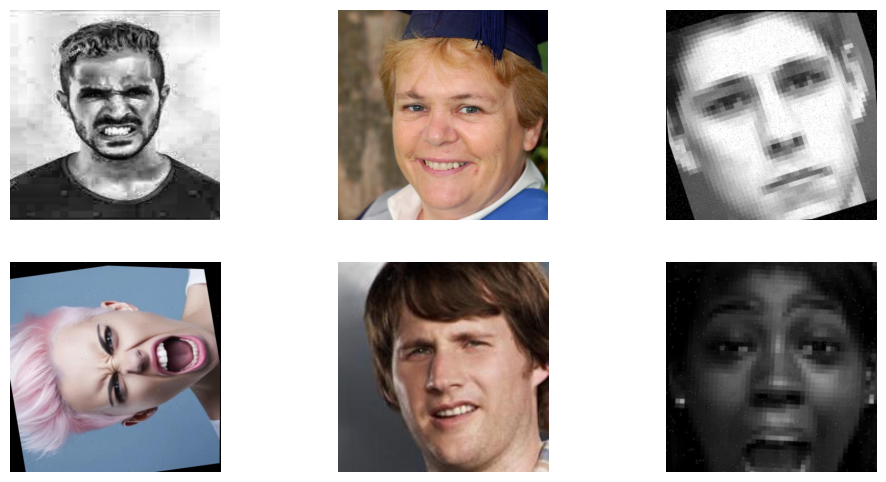

In [45]:
import matplotlib.pyplot as plt
from PIL import Image
import os

preprocessed_path = "/Users/natashababu/Documents/internship/facial-expression/preprocessed-dataset"
folders = ["train", "test", "valid"]

# Collect all image file paths
image_files = []
for folder in folders:
    folder_path = os.path.join(preprocessed_path, folder, "images")
    # Get all images inside this folder
    for f in os.listdir(folder_path):
        if f.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_files.append(os.path.join(folder_path, f))

# Visualize first 6 images
plt.figure(figsize=(12,6))
for i, img_path in enumerate(image_files[:6]):
    img = Image.open(img_path)
    plt.subplot(2,3,i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

- **Imports libraries**: `matplotlib` for plotting, `PIL` for opening images, and `os` for file handling.

- **Sets dataset paths**: `preprocessed_path` is the main folder, and `folders` lists `train`, `test`, and `valid`.

- **Collects image paths**: Loops through each folder, checks for `.png`, `.jpg`, `.jpeg` files, and adds their full paths to `image_files`.

- **Visualizes images**: Opens the first 6 images with `Image.open()`, displays them in a 2×3 grid using Matplotlib, and hides axes for clarity.

In [12]:
# For PyTorch >=2.0 (with MPS support)
!pip install torch torchvision torchaudio

### 🧩 Code Explanation

**Purpose:**  
Installs PyTorch and related libraries for deep learning, specifically compatible with **PyTorch ≥2.0** and **MPS (Metal Performance Shaders) support** on macOS.

**Libraries:**

- torch → Core PyTorch library for tensor operations and building neural networks.
- torchvision → Utilities for computer vision tasks (image transformations, pretrained models, datasets).
- torchaudio → Utilities for audio processing with PyTorch (datasets, transforms, models).

In [14]:
import torch
torch.backends.mps.is_available()  # Should return True
torch.backends.mps.is_built()      # Should return True

True

### 🧩 Code Explanation

**Purpose:**  
Checks if **MPS (Metal Performance Shaders)** is available and built on your Mac for PyTorch GPU acceleration.

**Code:**
```python
import torch

# Check if MPS (Apple GPU support) is available
torch.backends.mps.is_available()  # Returns True if MPS can be used

# Check if MPS is built in your PyTorch installation
torch.backends.mps.is_built()      # Returns True if PyTorch was compiled with MPS support

In [11]:
import torch
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA device count:", torch.cuda.device_count())
!nvidia-smi

PyTorch version: 2.8.0
CUDA available: False
CUDA device count: 0
zsh:1: command not found: nvidia-smi


- `import torch` → imports PyTorch library.  
- `torch.__version__` → shows PyTorch version.  
- `torch.cuda.is_available()` → checks if GPU (CUDA) is available.  
- `torch.cuda.device_count()` → shows number of available GPUs.  
- `!nvidia-smi` → displays GPU info and memory usage.  

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mkl-fft to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of mkl-random to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of mkl-umath to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 89.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.6 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

- `!pip install ultralytics` → installs the **Ultralytics YOLO library** in your environment.
  - `!` is used to run **shell commands** from a notebook.
  - `pip install` downloads and installs the package from **PyPI**.
  - `ultralytics` library provides YOLOv8 models for **object detection, segmentation, and classification**.

In [2]:
!ls /kaggle/input/

preprocessed-dataset  yolo-model


In [3]:
!ls /kaggle/input/preprocessed-dataset/preprocessed-dataset

preprocessed-dataset


- `!ls /kaggle/input/preprocessed-dataset`  
  - Lists all files and folders inside the directory `/kaggle/input/preprocessed-dataset`.  
  - `ls` is a shell command that shows directory contents.

- `!ls /kaggle/input/preprocessed-dataset/preprocessed-dataset`  
  - Lists all files and folders inside the subdirectory `/kaggle/input/preprocessed-dataset/preprocessed-dataset`.  
  - Useful for exploring the dataset structure before loading it.

# © Copying dataset into kaggle

In [67]:
import shutil
import os

# Original yaml path (read-only)
original_yaml = "/kaggle/input/preprocessed-dataset/data.yaml"

# Copy to working directory (editable)
shutil.copy(original_yaml, "/kaggle/working/data.yaml")

src_inner = "/kaggle/input/preprocessed-dataset/preprocessed-dataset"
dst = "/kaggle/working/preprocessed-dataset"

shutil.copytree(src_inner, dst, dirs_exist_ok=True)
print("✅ Inner dataset copied to working folder!")

✅ Inner dataset copied to working folder!


- `import shutil` → imports the `shutil` module for file operations.  
- `import os` → imports the `os` module for interacting with the filesystem.  
- `shutil.copy(original_yaml, "/kaggle/working/data.yaml")` → copies the read-only `data.yaml` file to the working directory so it can be edited.  
- `shutil.copytree(src_inner, dst, dirs_exist_ok=True)` → copies the entire inner dataset folder to the working directory.  
  - `dirs_exist_ok=True` allows copying even if the destination folder already exists.  
- `print("✅ ...")` → confirms that the dataset has been successfully copied.  

# ↗️ Updating data.yaml

In [68]:
import yaml
import os

yaml_path = "/kaggle/working/data.yaml"

with open(yaml_path, 'r') as f:
    data = yaml.safe_load(f)

# Update paths to the working folder
data['train'] = "/kaggle/working/preprocessed-dataset/train/images"
data['valid']   = "/kaggle/working/preprocessed-dataset/valid/images"
data['test']   = "/kaggle/working/preprocessed-dataset/test/images"

# Save the updated yaml
with open(yaml_path, 'w') as f:
    yaml.dump(data, f)

print("✅ data.yaml paths updated to working folder!")

✅ data.yaml paths updated to working folder!


- `import yaml` → imports the PyYAML library to read and write YAML files.  
- `yaml.safe_load(f)` → loads YAML content safely into a Python dictionary.  
- `data['train'] / data['valid'] / data['test']` → updates the dataset paths to point to the working directory, where the dataset was copied.  
- `yaml.dump(data, f)` → writes the updated dictionary back to the YAML file.  
- `print("✅ ...")` → confirms that the paths in `data.yaml` have been successfully updated.  

In [69]:
!ls /kaggle/working/preprocessed-dataset

preprocessed-dataset


- `!ls /kaggle/working/preprocessed-dataset`  
  - Lists all files and folders inside the directory `/kaggle/working/preprocessed-dataset`.  
  - Useful to check the dataset structure after copying.

- `!ls /kaggle/working/preprocessed-dataset/preprocessed-dataset`  
  - Lists all files and folders inside the subdirectory `/kaggle/working/preprocessed-dataset/preprocessed-dataset`.  
  - Helps verify that the inner dataset has been copied correctly and to explore its contents.

In [70]:
!pip install "numpy<2" "matplotlib==3.10.6" --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 65.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 80.4 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.3 which is incompatible.
datasets 4.1.1 requires pyarrow>=21.0.0, but you have pyarrow 19.0.1 which is incompatible.
onnx 1.18.0 requires protobuf>=4.25.1, but you have protobuf 3.20.3 which is incompatible.
ydata-profiling 4.17.0 requires matplotlib<=3.10,>=3.5, but you have matplotlib 3.10.6 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatibl

- Installs **specific versions** of Python packages in the notebook environment.  
- `"numpy<2"` → installs the latest NumPy version **less than 2**.  
- `"matplotlib==3.10.6"` → installs **Matplotlib version 3.10.6** exactly.  
- `--quiet` → suppresses installation messages for a cleaner output.

# Training model in kaggle using GPU

In [75]:
!mv /kaggle/working/preprocessed-dataset/preprocessed-dataset/* /kaggle/working/preprocessed-dataset/
!rm -rf /kaggle/working/preprocessed-dataset/preprocessed-dataset

### 1️⃣ Move all files from a nested folder to its parent

- **`mv`**: Linux command to move files or directories.  
- **Source**: `/kaggle/working/preprocessed-dataset/preprocessed-dataset/*`  
  - The `*` selects **all files and subfolders** inside the nested folder.  
- **Destination**: `/kaggle/working/preprocessed-dataset/`  
  - The parent folder where everything will be moved.  
- **Effect**: All contents from the inner `preprocessed-dataset` folder are moved **up one level**.

---

### 2️⃣ Delete the now-empty nested folder

- **`rm`**: Linux command to remove files or directories.  
- **`-r`**: Recursive delete — removes all contents inside the folder.  
- **`-f`**: Force delete — skips confirmation prompts.  
- **Effect**: Removes the empty inner `preprocessed-dataset` folder completely.

In [76]:
!find /kaggle/working/preprocessed-dataset -type d

/kaggle/working/preprocessed-dataset
/kaggle/working/preprocessed-dataset/test
/kaggle/working/preprocessed-dataset/test/images
/kaggle/working/preprocessed-dataset/test/labels
/kaggle/working/preprocessed-dataset/train
/kaggle/working/preprocessed-dataset/train/images
/kaggle/working/preprocessed-dataset/train/labels
/kaggle/working/preprocessed-dataset/valid
/kaggle/working/preprocessed-dataset/valid/images
/kaggle/working/preprocessed-dataset/valid/labels


### List all directories inside a folder

- **`find`**: Linux command to search for files and directories.  
- **`/kaggle/working/preprocessed-dataset`**: The root folder where the search starts.  
- **`-type d`**: Restricts the search to **directories only**.  
- **Effect**: Displays a **list of all directories** inside `/kaggle/working/preprocessed-dataset`, including nested subfolders.

In [10]:
!cat data.yaml

names:
- angry
- contempt
- disgust
- fear
- happy
- natural
- sad
- sleepy
- surprised
nc: 9
test: /kaggle/working/preprocessed-dataset/test/images
train: /kaggle/working/preprocessed-dataset/train/images
val: /kaggle/working/preprocessed-dataset/valid/images


### Display the contents of a file

- **`cat`**: Linux command to **read and display the contents** of a file in the terminal.  
- **`data.yaml`**: The file whose content will be shown.  
- **Effect**: Prints the **full content of `data.yaml`** to the output, so you can verify or review it.

In [11]:
from ultralytics import YOLO

## 1️⃣ Load pretrained YOLOv8 nano model
# 's' = small → fastest and lightest for small datasets
model = YOLO("yolov8s.pt")

# 2️⃣ Training parameters optimized
model.train(
    data="/kaggle/working/data.yaml",     # Path to your dataset YAML
    epochs=10,           # Max epochs; early stopping will stop sooner
    imgsz=416,            # Image size (resize all images)
    device=0,            # Use colab GPU
    patience=5,          # Early stopping if val mAP doesn't improve for 10 epochs
    batch=32,             # Adjust batch size if you get memory errors
    augment=True,         # Enable YOLO's built-in augmentation
    hsv_h=0.015,          # Hue augmentation
    hsv_s=0.7,            # Saturation
    hsv_v=0.4,            # Brightness/value
    degrees=10,           # Random rotation
    translate=0.1,        # Random translation
    scale=0.5,            # Random scaling
    shear=2.0,            # Random shear
    fliplr=0.5,           # Horizontal flip
    flipud=0.0,           # Vertical flip
    mosaic=1.0,           # Mosaic augmentation
    mixup=0.1,             # Mixup augmentation
    cache=True,
    half=True,
    amp=False            # disables AMP to prevent the resize error
)

Ultralytics 8.3.208 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=False, augment=True, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=10, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=True, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train5, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, perspective=0.0, plots=True, pose=12.0, pretr

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x787cd25781d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0470

### 🧩 YOLOv8 Training Code Explanation

**Purpose:**  
Load a pretrained YOLOv8 small model and train it on a custom dataset with data augmentation and optimized parameters.

---

#### 1. Import YOLO: Loads the YOLO class from the Ultralytics library.
#### 2. Load pretrained model
- "yolov8s.pt" → small model (smallest and fastest, ideal for small datasets).
- Pretrained weights help the model converge faster.
#### 3. Train the model
| Parameter           | Description                                              |
| ------------------- | -------------------------------------------------------- |
| `data`              | Path to dataset YAML (images, labels, class names)       |
| `epochs`            | Maximum training cycles                                  |
| `imgsz`             | Resize all images to this size                           |
| `device`            | `"0"` → Use GPU T4 X 2 for faster training               |
| `patience`          | Early stopping if validation performance doesn’t improve |
| `batch`             | Number of images per batch                               |
| `augment`           | Enable YOLO’s built-in data augmentation                 |
| `hsv_h/s/v`         | Adjust hue, saturation, brightness randomly              |
| `degrees`           | Random rotation                                          |
| `translate`         | Random image shift                                       |
| `scale`             | Random scaling                                           |
| `shear`             | Random shear transformation                              |
| `fliplr` / `flipud` | Horizontal/vertical flips                                |
| `mosaic`            | Combine 4 images into 1 for better generalization        |
| `mixup`             | Blend two images and labels to reduce overfitting        |
| `cache`             | Speeds up training by caching images in RAM or disk      |
| `half`              | Uses half-precision (FP16) training instead of full-precision (FP32)|


---

# 📊 Main Metrics Explained

| Metric                 | Meaning                                                                  | Good Range                    |
| :--------------------- | :----------------------------------------------------------------------- | :---------------------------- |
| **Box(P)** (Precision) | Out of all predicted boxes, how many are correct (low false positives).  | High = good (→1.0)            |
| **R** (Recall)         | Out of all actual objects, how many were detected (low false negatives). | High = good (→1.0)            |
| **mAP50**              | Mean Average Precision at IoU=0.50 — standard object detection score.    | >0.8 = strong                 |
| **mAP50-95**           | Average of mAP from IoU 0.50 to 0.95 (harder metric).                    | >0.6 = good, >0.7 = excellent |

---

# 🔍 Overall Performance

| Metric            | Score       |
| :---------------- | :---------- |
| **Precision (P)** | 0.771       |
| **Recall (R)**    | 0.739       |
| **mAP@0.5**       | **0.825** ✅ |
| **mAP@0.5:0.95**  | **0.639** ✅ |

## 👉 Interpretation:

- Model is performing well — it correctly identifies most expressions with decent precision and recall.

- mAP@0.5 = 82.5% means that at a 50% overlap threshold, detections are ~82% accurate overall.

- mAP@0.5:0.95 = 63.9% means it remains robust even under stricter matching rules.

---

# 😃 Per-Class Results (Key Highlights)

| Class        | Precision | Recall | mAP@0.5   | mAP@0.5:0.95 | Comment                         |
| :----------- | :-------- | :----- | :-------- | :----------- | :------------------------------ |
| **happy**    | 0.866     | 0.891  | **0.949** | 0.748        | Best performing class           |
| **sleepy**   | 0.806     | 0.921  | 0.885     | 0.584        | Very high recall                |
| **sad**      | 0.774     | 0.804  | 0.849     | 0.628        | Good detection consistency      |
| **disgust**  | 0.764     | 0.704  | 0.802     | 0.695        | Balanced                        |
| **fear**     | 0.768     | 0.776  | 0.835     | 0.692        | Stable                          |
| **contempt** | 0.654     | 0.531  | 0.694     | 0.583        | Weakest class (needs more data) |
| **natural**  | 0.695     | 0.558  | 0.702     | 0.496        | Underperforming slightly        |

👉 You can see “happy” and “sleepy” are easiest for the model, while “contempt” and “natural” are hardest — likely due to fewer examples or visual similarity to other expressions.

# 🛟 Saving trained model

In [7]:
model.save("/kaggle/working/trained_model.pt")

- Saves the trained YOLOv8 model to the specified path.  
- The file `trained_model.pt` contains the **model weights and configuration**.  
- This allows you to **reload the model later** for inference or further training.

In [8]:
from IPython.display import FileLink

# Create a link to download
FileLink("/kaggle/working/trained_model.pt")

/kaggle/working/trained_model.pt

- `from IPython.display import FileLink` → imports a function to create clickable download links in Jupyter/Kaggle notebooks.  
- `FileLink("/kaggle/working/trained_model.pt")` → generates a download link for the trained YOLO model saved in the working directory.  
- Clicking the link allows you to download the `.pt` model file to your local machine.  

# 🤐 Zipping trained model

In [ ]:
import zipfile

# Path to your model
model_path = "/kaggle/working/trained_model.pt"
zip_path = "/kaggle/working/yolov8_model.zip"

# Create a zip file
with zipfile.ZipFile(zip_path, 'w') as zipf:
    zipf.write(model_path, arcname="trained_model.pt")  # arcname avoids storing full path

print("Model zipped successfully!")

- `import zipfile` → imports Python’s built-in module to create and extract ZIP files.  
- `model_path` → path to the trained YOLO model `.pt` file.  
- `zip_path` → path where the ZIP file will be saved.  
- `zipfile.ZipFile(zip_path, 'w')` → opens/creates a ZIP file in write mode.  
- `zipf.write(model_path, arcname="trained_model.pt")` → adds the model file to the ZIP.  
  - `arcname` ensures only the filename is stored inside the ZIP, not the full folder path.  
- `print("Model zipped successfully!")` → confirms that the model has been zipped.  

# 🤐 Zipping trained model weights (best.pt & last.pt)

In [19]:
import shutil

# Path to weights folder
weights_folder = "/kaggle/working/runs/detect/train5/weights"

# Path to save zip
zip_path = "/kaggle/working/train5_weights.zip"

# Create zip archive
shutil.make_archive(zip_path.replace('.zip',''), 'zip', weights_folder)

print("Weights zipped successfully!")

Weights zipped successfully!


### Explanation

- **`shutil.make_archive(base_name, format, root_dir)`**: Creates a compressed archive of the specified folder.

- **Parameters:**
  - `base_name`: Path and name for the zip file **without the extension**.
  - `format`: Archive format, e.g., `'zip'`.
  - `root_dir`: The folder to be zipped (e.g., `weights_folder`).

- **Effect:** All files in `weights_folder` are compressed into `train5_weights.zip` in `/kaggle/working/`.

- **`print` Statement:** Confirms successful creation of the zip file.

# ⌛️ Importing trained model

In [3]:
from ultralytics import YOLO

# Path to your saved model
model_path = "/Users/natashababu/Documents/internship/facial-expression/trained_model.pt"

# Load the model
model = YOLO(model_path)
model.eval()  # Set model to evaluation mode

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_s

- `from ultralytics import YOLO` → Import YOLO model class.  
- `model_path = "..."` → Path to your trained model.  
- `model = YOLO(model_path)` → Load the trained model.  
- `model.eval()` → Set model to evaluation mode for inference.

In [69]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


You need **OpenCV** to handle and display images in Python.  

# 📷 Testing the model using a webcam

In [73]:
# Open default webcam (0)
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # YOLO expects RGB images, OpenCV uses BGR
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Run prediction
    results = model(rgb_frame)

    # Render results on frame
    annotated_frame = cv2.cvtColor(results[0].plot(), cv2.COLOR_RGB2BGR)  # returns image with boxes drawn

    # Display annotated frame
    cv2.imshow("YOLO Webcam", annotated_frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release webcam and close windows
cap.release()
cv2.destroyAllWindows()


0: 256x416 (no detections), 58.3ms
Speed: 4.9ms preprocess, 58.3ms inference, 3.2ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 (no detections), 36.2ms
Speed: 1.0ms preprocess, 36.2ms inference, 0.2ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 (no detections), 40.6ms
Speed: 1.0ms preprocess, 40.6ms inference, 0.3ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 (no detections), 50.8ms
Speed: 1.2ms preprocess, 50.8ms inference, 0.2ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 (no detections), 48.5ms
Speed: 1.3ms preprocess, 48.5ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 (no detections), 49.7ms
Speed: 1.4ms preprocess, 49.7ms inference, 0.3ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 (no detections), 47.4ms
Speed: 1.4ms preprocess, 47.4ms inference, 0.3ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 (no detections), 43.8ms
Speed: 1.1ms preprocess, 43.8ms i

- **Open webcam** with `cv2.VideoCapture(0)`.  
- **Read frames** in a loop (`cap.read()`).  
- **Convert BGR → RGB** because YOLO expects RGB.  
- **Run YOLO prediction** on the frame (`results = model(rgb_frame)`).  
- **Draw predictions** on the frame (`results[0].plot()`) and convert back to BGR for OpenCV.  
- **Display annotated frames** in a window (`cv2.imshow`).  
- **Exit loop** if `'q'` is pressed.  
- **Release resources** with `cap.release()` and `cv2.destroyAllWindows()`.

# 💭 Testing the model with sample image

In [27]:
# Predict on an image
results = model("/Users/natashababu/Documents/internship/facial-expression/n.jpeg")

# Show the results of the first (and only) image
results[0].show()


image 1/1 /Users/natashababu/Documents/internship/facial-expression/n.jpeg: 256x416 1 happy, 51.2ms
Speed: 2.2ms preprocess, 51.2ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 416)


`results = model("path/to/image")`  
Runs the YOLO model on a single image and stores the predictions in `results`.

`results[0].show()`  
Displays the image with predicted bounding boxes and labels.  
`results[0]` is used because `results` can contain multiple images, but here there’s only one.

In [29]:
for r in results:
    print(r.boxes.xyxy)   # bounding box coordinates
    print(r.boxes.conf)   # confidence scores
    print(r.boxes.cls)    # predicted class IDs

tensor([[252.2576,  32.7939, 465.8967, 253.3410]])
tensor([0.3151])
tensor([4.])


- `results` may contain predictions for multiple images.  
- `r.boxes.xyxy` gives the coordinates of the bounding boxes.  
- `r.boxes.conf` shows how confident the model is about each prediction.  
- `r.boxes.cls` provides the class IDs corresponding to the predicted labels.  

---

# 🤔 Evaluating and predicting the model

In [25]:
metrics = model.val(data="/Users/natashababu/Documents/internship/facial-expression/data.yaml")
print(metrics)  # shows mAP, precision, recall, etc.

Ultralytics 8.3.203 🚀 Python-3.12.2 torch-2.8.0 CPU (Apple M3 Pro)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 176.5±67.9 MB/s, size: 66.8 KB)
val: Scanning /Users/natashababu/Documents/internship/facial-expression/preprocessed-dataset/valid/labels.cache... 1720 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1720/1720 2.8Mit/s 0.0s0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 108/108 0.5it/s 3:512.2ss
                   all       1720       1720      0.795      0.769       0.85      0.655
                 angry        258        258      0.809      0.806        0.9      0.695
              contempt         82         82      0.689      0.595      0.737      0.601
               disgust        108        108      0.749      0.741      0.837      0.724
                  fear        107        107      0.744      0.785      0.862      0.722
                 happy        387        387      0.882      0.885      0.

- `metrics = model.val(data="path/to/data.yaml")`  
  Runs evaluation of the YOLO model on the validation dataset specified in `data.yaml`.  

- `print(metrics)`  
  Displays evaluation metrics such as mAP (mean Average Precision), precision, recall, and other performance indicators.

In [27]:
# Run predictions
results = model.predict(source="preprocessed-dataset/test/images",  # folder or single image
                        save=True,      # saves predictions in 'runs/detect/predict'
                        conf=0.25,      # confidence threshold
                        show=True)      # display predictions


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1700 /Users/natashababu/Documents/internship/facial-expression/preprocessed-dataset/test/images/01a6c69e76d729863380b8391d780e53070cf8629ad9ffd5d06826551271fe74_-_30_-_-_20201207110113-004-010_jpg.rf.12ba6581114cf2ec0fd5d8985deab55f.jpg: 416x416 1 happy, 51.6ms
image 2/1700 /Users/natashababu/Documents/internship/facial-expression/preprocessed-dataset/test/images/01a6c69e76d729863380b8391d780e53070cf8629ad9ffd5d06826551271fe74_-_30_-_-_20201207

- `results = model.predict(...)`  
  Runs YOLO predictions on the specified source (can be a folder or a single image).  

- `source="preprocessed-dataset/test/images"`  
  The folder or image on which predictions are run.  

- `save=True`  
  Saves the predicted images with bounding boxes to `runs/detect/predict`.  

- `conf=0.25`  
  Sets the confidence threshold for predictions; only predictions above 25% confidence are shown.  

- `show=True`  
  Displays the predicted images with bounding boxes while running.

---

# 📊 Visualisation

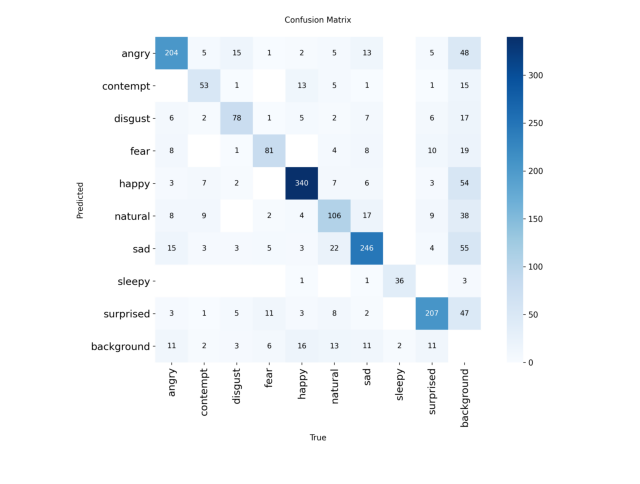

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("runs/detect/val/confusion_matrix.png")
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis('off')
plt.show()

- `%matplotlib inline`  
  Ensures that plots are displayed directly inside the Jupyter notebook.  

- `import matplotlib.pyplot as plt` and `import matplotlib.image as mpimg`  
  Import the libraries for plotting and reading images.  

- `img = mpimg.imread("runs/detect/val/confusion_matrix.png")`  
  Loads the saved confusion matrix image.  

- `plt.figure(figsize=(8,8))`  
  Creates a figure of size 8x8 inches for displaying the image.  

- `plt.imshow(img)`  
  Displays the image.  

- `plt.axis('off')`  
  Hides the axis ticks and labels for a cleaner view.  

- `plt.show()`  
  Renders the image in the notebook.

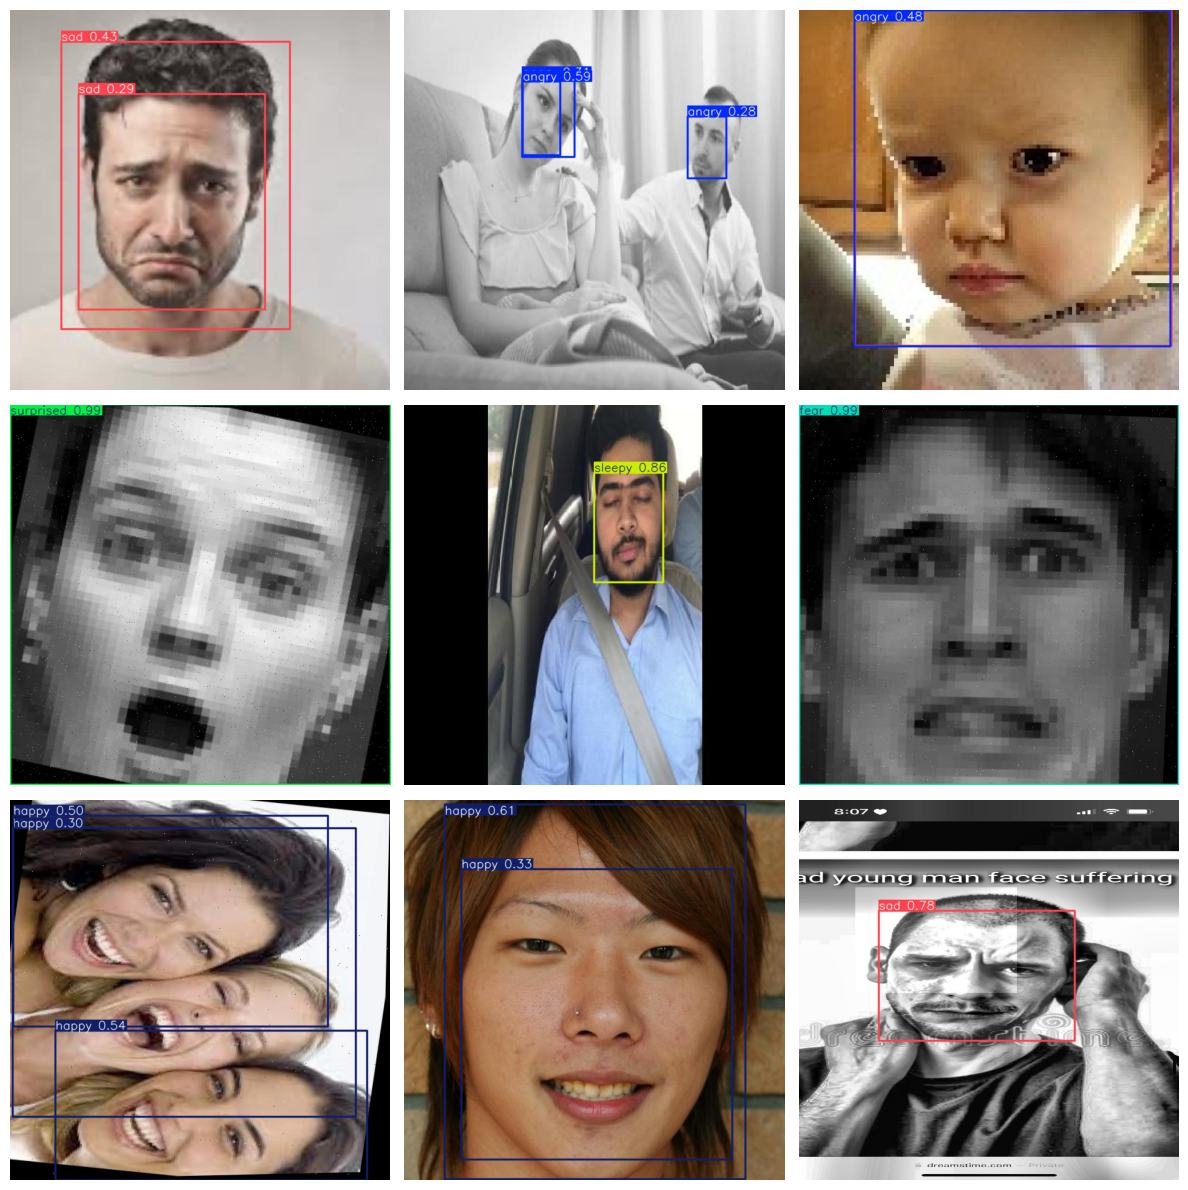

In [23]:
import os
from IPython.display import Image, display

# Path to the folder with predictions
pred_path = "runs/detect/predict/"

# Get all predicted images
pred_images = [os.path.join(pred_path, f) for f in os.listdir(pred_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Display only first 9 images
plt.figure(figsize=(12,12))
for i, img_file in enumerate(pred_images[:9]):
    img = mpimg.imread(img_file)
    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.axis('off')
plt.tight_layout()
plt.show()

- `import os` and `from IPython.display import Image, display`  
  Import libraries for file handling and displaying images in Jupyter.  

- `pred_path = "runs/detect/predict/"`  
  Specifies the folder where YOLO saved the predicted images.  

- `pred_images = [os.path.join(pred_path, f) for f in os.listdir(pred_path) if f.endswith(('.png', '.jpg', '.jpeg'))]`  
  Creates a list of all image file paths in the folder.  

- `plt.figure(figsize=(12,12))`  
  Sets up a plotting figure of size 12x12 inches.  

- `for i, img_file in enumerate(pred_images[:9]):`  
  Loops over the first 9 predicted images.  

- `img = mpimg.imread(img_file)`  
  Reads each image.  

- `plt.subplot(3, 3, i+1)`  
  Arranges the images in a 3x3 grid.  

- `plt.imshow(img)`  
  Displays the image in the corresponding subplot.  

- `plt.axis('off')`  
  Hides axis ticks and labels for a cleaner look.  

- `plt.tight_layout()`  
  Adjusts spacing between subplots to avoid overlap.  

- `plt.show()`  
  Renders the 3x3 grid of predicted images in the notebook.

In [33]:
!find /kaggle/working/preprocessed-dataset -type d

/kaggle/working/preprocessed-dataset
/kaggle/working/preprocessed-dataset/test
/kaggle/working/preprocessed-dataset/test/images
/kaggle/working/preprocessed-dataset/test/labels
/kaggle/working/preprocessed-dataset/train
/kaggle/working/preprocessed-dataset/train/images
/kaggle/working/preprocessed-dataset/train/labels
/kaggle/working/preprocessed-dataset/valid
/kaggle/working/preprocessed-dataset/valid/images
/kaggle/working/preprocessed-dataset/valid/labels


### Command: `!find /kaggle/working/preprocessed-dataset -type d`

- **`find`**: Linux command used to search for files and directories within a specified path.
- **Path:** `/kaggle/working/preprocessed-dataset`  
  The directory where the search starts.
- **`-type d`**: Filters results to only show directories (folders), not files.
- **Effect:**  
  Lists all directories inside `/kaggle/working/preprocessed-dataset` including nested ones. Useful for verifying folder structure.

---

# 🚄 Fine-tuning and retraining the model

In [18]:
from ultralytics import YOLO

# Path to your previous checkpoint
checkpoint_path = "runs/detect/train5/weights/best.pt"  # or best.pt

# Load the model from checkpoint
model = YOLO(checkpoint_path)

# Resume training (more epochs)
model.train(
    data="/kaggle/working/data.yaml",   # Dataset config
    epochs=20,                          # Increase total epochs
    lr0=0.001,                          # smaller learning rate
    lrf=0.01,                           # final LR fraction
    resume=False,                       # Preserves everything (weights, optimizer, LR schedule, epoch)
    imgsz=416,                          # Input image size
    batch=32,                           # Adjust based on GPU memory
    device=0,                           # GPU
    momentum=0.937,                     # Momentum for optimizer
    weight_decay=0.0005,                # Regularization
    warmup_epochs=2,                    # Gradual learning at start
    patience=5,                         # Early stopping patience
    augment=True,                       # Keep augmentations
    hsv_h=0.015,                        # Hue augmentation
    hsv_s=0.7,                          # Saturation
    hsv_v=0.4,                          # Brightness/value
    degrees=10,                         # Slightly increase rotation
    translate=0.2,                      # More translation
    scale=0.7,                          # Scaling factor
    shear=1.0,
    fliplr=0.3,
    flipud=0.05,
    mosaic=0.5,
    mixup=0.05,                          # mixup
    cache=True,
    half=True,                          # Mixed precision (faster)
    amp=True                           # automatic mixed precision scaling
)

New https://pypi.org/project/ultralytics/8.3.209 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.208 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=10, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.3, flipud=0.05, format=torchscript, fraction=1.0, freeze=None, half=True, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.05, mode=train, model=runs/detect/train5/weights/best.pt, momentum=0.937, mosaic=0.5, multi_scale=False, name=train6, nbs=64, nms

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x787cdd498fd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0470

### Key Points for YOLOv8 Checkpoint Training

- **Data & Epochs:**  
  `data` points to the dataset configuration YAML file.  
  `epochs` determines the total number of training iterations.

- **Checkpoint Loading:**  
  `YOLO(checkpoint_path)` loads pretrained weights to resume training.

- **Resume Training:**  
  `resume=False` ensures training starts fresh while still using the loaded weights.

- **Learning Rate:**  
  `lr0` is smaller for fine-tuning.  
  `lrf` controls the decay to the final learning rate.

- **Data Augmentation:**  
  Parameters like `mosaic`, `mixup`, `hsv_*`, `degrees`, `translate`, `scale`, `shear` increase dataset variability and improve model generalization.

- **Optimization:**  
  `momentum` and `weight_decay` regulate the optimizer’s behavior for stability and regularization.

- **Precision:**  
  `half=True` and `amp=True` enable mixed-precision training, improving speed and reducing memory usage.

- **Batch & Image Size:**  
  Adjusted based on GPU memory to maximize efficiency and prevent out-of-memory errors.

---
# 📊 Overall Model Performance

| Metric            | Score       | Meaning                                |
| :---------------- | :---------- | :------------------------------------- |
| **Precision (P)** | 0.716       | 72% of detections are correct          |
| **Recall (R)**    | 0.742       | 74% of real objects are detected       |
| **mAP@0.5**       | **0.802** ✅ | 80% accuracy under standard IoU        |
| **mAP@0.5:0.95**  | **0.604** ✅ | 60% accuracy under stricter conditions |


---

# 🤐 Zipping the best model

In [91]:
import shutil

src = "/kaggle/working/runs/detect/train6/weights"
dst = "/kaggle/working/best_model"

# Create a zip of the weights folder
shutil.make_archive(dst, 'zip', src)
print("Zipped model saved to:", dst + ".zip")

Zipped model saved to: /kaggle/working/best_model.zip


### Explanation for Zipping Model Weights

- **`shutil.make_archive(dst, 'zip', src)`**: Compresses the folder at `src` into a zip file at `dst.zip`.  
- **`src`**: Path of the folder to be zipped (weights folder).  
- **`dst`**: Path and name for the resulting zip file (without `.zip` extension).  
- **Effect**: All files inside the weights folder are packaged into `/kaggle/working/best_model.zip`.  
- **`print` Statement**: Confirms the location and name of the saved zip file.  